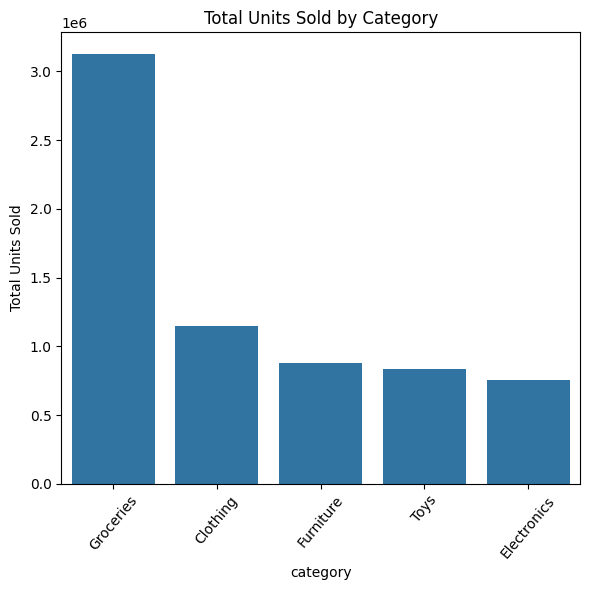

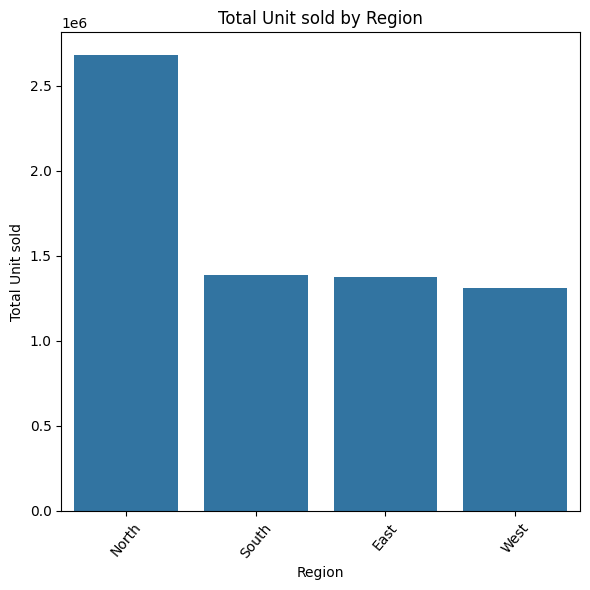

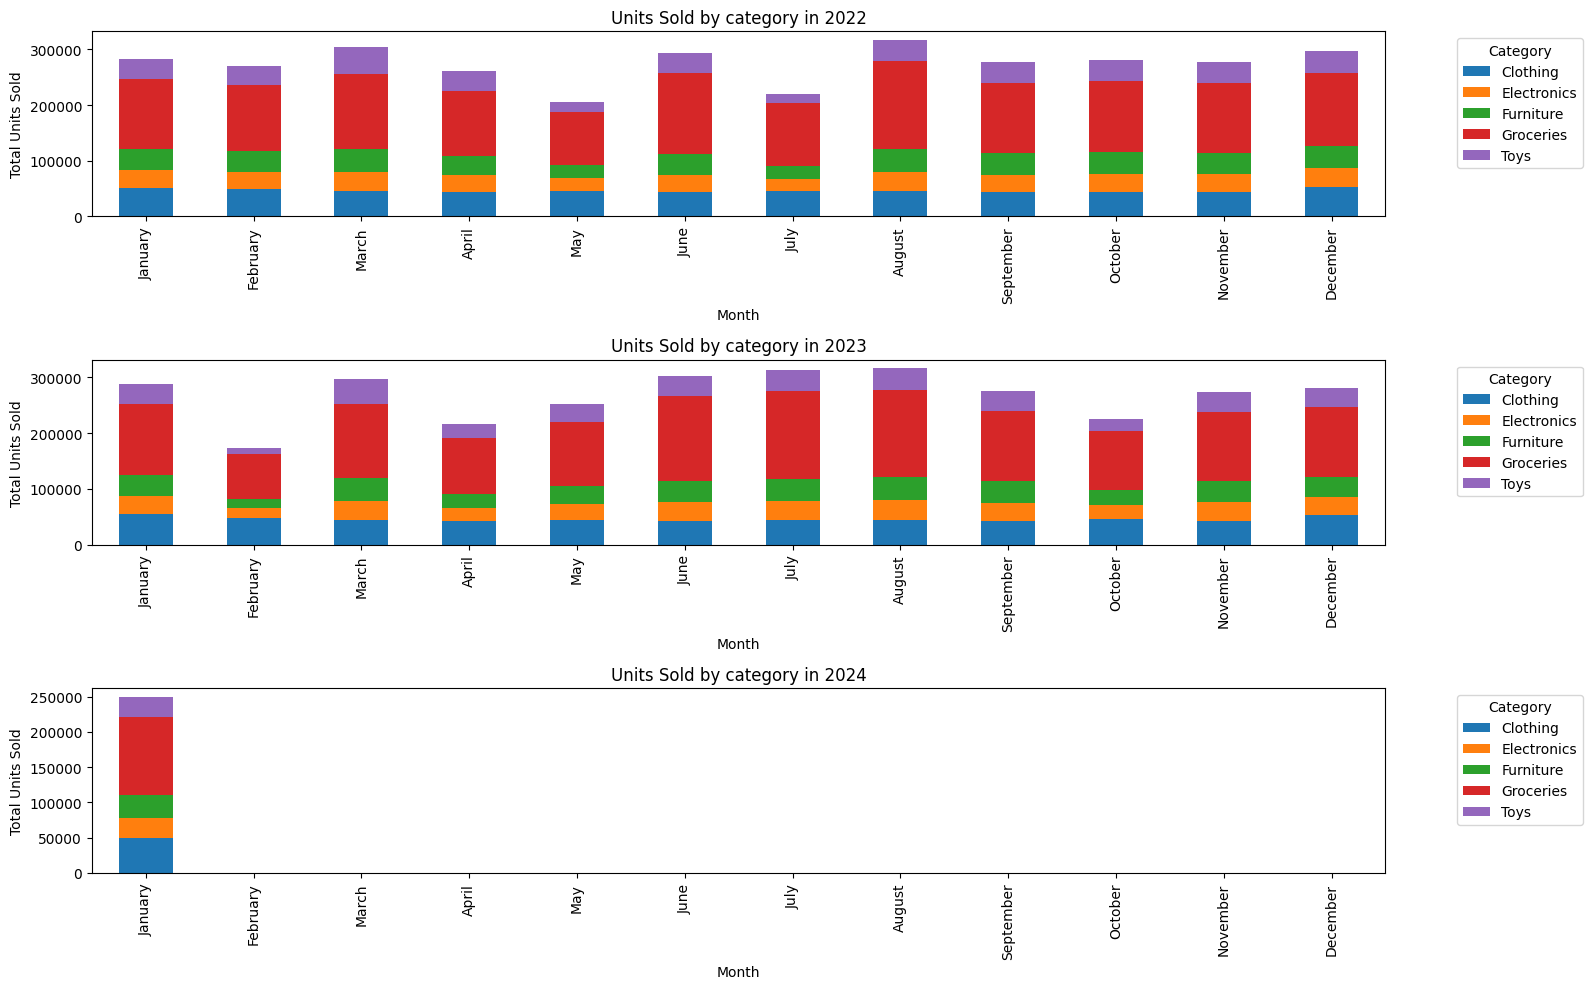

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/Users/sachin/Downloads/sales_data.csv")
# df.head()
# df.describe()
# df.info()

category_sales = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
region_sales=df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)

# Sold units across Categories
plt.figure(figsize=(6,6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Units Sold by Category')
plt.xlabel('category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

# Sold units across Regions
plt.figure(figsize=(6,6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Unit sold by Region')
plt.xlabel('Region')
plt.ylabel('Total Unit sold')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


df['Date']=pd.to_datetime(df['Date'])

# Extract year and month from Date
df['year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()

# Create Year-Month column for chronological sorting
df['Year_Month']=df['Date'].dt.strftime('%y-%m')


# Group by Year, Month, and Category, then sum the Units Sold
sales_summary = df.groupby(['year', 'Month', 'Category'])['Units Sold'].sum().reset_index()

# Group by Year, Month, and Category, then sum the Units Sold
sales_summary['Month_Num']=pd.Categorical(sales_summary['Month'],
                                          categories=["January","February","March","April","May",
                                          "June","July","August","September","October","November",
                                          "December"], ordered=True)
sales_summary=sales_summary.sort_values(['year','Month_Num']).drop('Month_Num',axis=1)


pivot_table=sales_summary.pivot_table(index=['year','Month'],
                                     columns='Category',
                                     values='Units Sold',
                                     fill_value=0)
# Display the pivot table
# print("Sum of Units Sold by Year, Month, and Category:")
# print(pivot_table)


plt.figure(figsize=(16,10))
for year in sales_summary['year'].unique():
    year_data=sales_summary[sales_summary['year']==year]
    pivot=year_data.pivot(index='Month', columns='Category', values='Units Sold')
    # Sort months chronologically
    month_order=["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
    pivot=pivot.reindex(month_order)
    ax=plt.subplot(len(sales_summary['year'].unique()),1,
                   list(sales_summary['year'].unique()).index(year)+1)
    pivot.plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Units Sold by category in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Units Sold')
    plt.legend(title='Category',bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

